In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

In [29]:
df= pd.read_csv("LaptopPrice.csv")  #to read a csv file
df


,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [30]:
# Load the dataset into the df variable

df.drop_duplicates(inplace=True)

# Remove rows with null values

# Drop columns only if they exist in the dataframe
# Drop columns only if they exist in the dataframe
columns_to_drop = ['weight', 'rating', 'Number of Ratings', 'Number of Reviews']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)
df.dropna(inplace=True)

df # Display the first few rows of the modified dataframe
# Encode categorical columns

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,warranty,Touchscreen,msoffice,Price
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,No warranty,No,No,34649
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,No warranty,No,No,38999
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,No warranty,No,No,39999
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,No warranty,No,No,69990
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,No warranty,No,No,26990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,1 year,No,No,135990
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,1 year,No,No,144990
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,1 year,No,No,149990
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,1 year,No,No,142990


In [31]:
df['warranty'].unique() 

array(['No warranty', '1 year', '2 years', '3 years'], dtype=object)

In [32]:
dict_warranty = {
    "No warranty": '0' ,
    "1 year": 1,
    "2 years": 2,
    "3 years": 3
}

In [33]:
df['warranty'] = df['warranty'].map(dict_warranty)

In [34]:
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,warranty,Touchscreen,msoffice,Price
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,0,No,No,34649
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,0,No,No,38999
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,0,No,No,39999
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,0,No,No,69990
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,0,No,No,26990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,1,No,No,135990
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,1,No,No,144990
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,1,No,No,149990
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,1,No,No,142990


In [35]:
label_encoder = LabelEncoder()
output = label_encoder.fit_transform(df['os_bit'])
df['os_bit'] = output

In [36]:
label_encoder = LabelEncoder()
output = label_encoder.fit_transform(df['processor_brand'])
df['processor_brand']= output  # Check unique values in the 'processor_brand' column
output= label_encoder.fit_transform(df['processor_name'])
df['processor_name']= output  # Check unique values in the 'processor_name' column
output= label_encoder.fit_transform(df['graphic_card_gb'])
df['graphic_card_gb']= output  # Check unique values in the 'graphic_card_gb' column
output= label_encoder.fit_transform(df['ram_gb'])
df['ram_gb']= output  # Check unique values in the 'ram_gb' column
output= label_encoder.fit_transform(df['ram_type'])
df['ram_type']= output  # Check unique values in the 'ram_type' column
output= label_encoder.fit_transform(df['hdd'])
df['hdd']= output  # Check unique values in the 'hdd' column
output= label_encoder.fit_transform(df['ssd'])
df['ssd']= output  # Check unique values in the 'ssd' column
output= label_encoder.fit_transform(df['Touchscreen'])
df['Touchscreen']= output  # Check unique values in the 'Touchscreen' column
output= label_encoder.fit_transform(df['msoffice'])
df['msoffice']= output  # Check unique values in the 'msoffice' column
output= label_encoder.fit_transform(df['os'])
df['os']= output  # Check unique values in the 'os' column
output= label_encoder.fit_transform(df['processor_gnrtn'])
df['processor_gnrtn']= output  # Check unique values in the 'processor_gnrtn' column
output= label_encoder.fit_transform(df['brand'])
df['brand']= output  # Check unique values in the 'brand' column    


In [37]:
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,warranty,Touchscreen,msoffice,Price
0,1,1,1,0,2,1,0,1,2,1,0,0,0,0,34649
1,5,1,1,0,2,1,0,1,2,1,0,0,0,0,38999
2,5,1,1,0,2,1,0,1,2,1,0,0,0,0,39999
3,1,1,2,0,3,1,6,0,2,0,1,0,0,0,69990
4,1,1,0,7,2,1,0,3,2,1,0,0,0,0,26990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,1,0,10,7,2,1,1,0,2,1,0,1,0,0,135990
819,1,0,10,7,2,1,1,0,2,1,0,1,0,0,144990
820,1,0,10,7,2,1,1,0,2,1,2,1,0,0,149990
821,1,0,10,7,2,1,1,0,2,1,2,1,0,0,142990


Model Performance Metrics:
MSE: 533453376.00
RMSE: 23096.61
R2 Score: 0.75


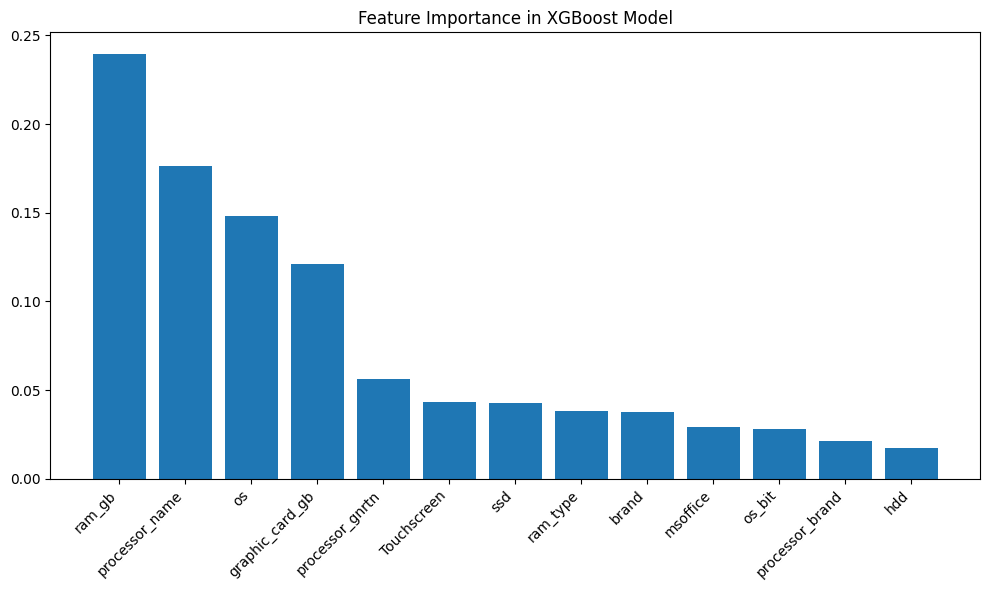

In [39]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Drop warranty column since it's causing issues
X = df.drop(['Price', 'warranty'], axis=1) 
y = df['Price']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train XGBoost model
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    enable_categorical=True  # Enable categorical features
)

xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}") 
print(f"R2 Score: {r2:.2f}")

# Feature importance plot
plt.figure(figsize=(10,6))
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance in XGBoost Model')
plt.tight_layout()
plt.show()


In [40]:
import joblib
joblib.dump(xgb_model, 'xgboost_model.pkl')
joblib.load('xgboost_model.pkl')

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)